In [1]:
from scholars import *
X = np.genfromtxt('data/X_train.txt', delimiter=',')
Y = np.genfromtxt('data/Y_train.txt', delimiter=',')
X_test = np.genfromtxt('data/X_test.txt', delimiter=',')
X, Y = ml.shuffleData(X, Y)
Xtr,Xva,Ytr,Yva = ml.splitData(X,Y,0.75) 
np.random.seed(0)

('error percentage: ', 0.35129310344827586)
('error percentage: ', 0.33997844827586204)
('error percentage: ', 0.33405172413793105)
('error percentage: ', 0.33782327586206895)
('error percentage: ', 0.3432112068965517)


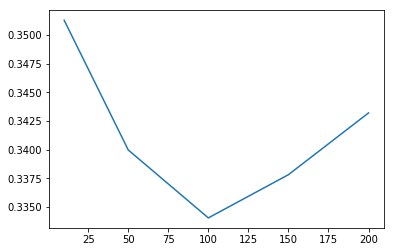

In [150]:
#GRADIENT BOOSTING CLASSIFIER FROM SKLEARN.ENSEMBLE 
#n_estimators = 100


n_estimators = [10,50, 100, 150, 200]
errList = list()
for n in n_estimators:
    gradientBoostingClassifier = GradientBoostingClassifier(n_estimators=n)
    gradientBoostingClassifier.fit(Xtr, Ytr)
    
    prediction = gradientBoostingClassifier.predict_proba(Xva)[:, 1]
    
    errCount = 0
    for pred, va in list(zip(prediction, Yva)):
        if(not ((pred<0.5 and va<0.5) or (pred>0.5 and va>0.5))):
            errCount += 1
    errPercentage = float(errCount)/len(prediction)
    errList.append(errPercentage)
    #print("Prediction: ", prediction)
    print("error percentage: ", errPercentage)
plt.plot(n_estimators, errList)
plt.show()

('error percentage: ', 0.3275862068965517)
('error percentage: ', 0.33566810344827586)
('error percentage: ', 0.33459051724137934)
('error percentage: ', 0.33459051724137934)
('error percentage: ', 0.3442887931034483)
('error percentage: ', 0.33351293103448276)


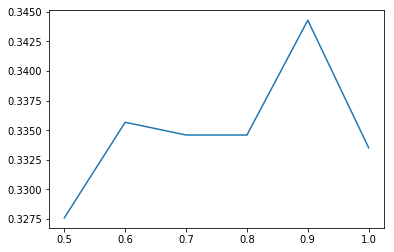

In [147]:
subsamples = [0.5,0.6,0.7,0.8,0.9,1]
errList = list()
for s in subsamples:
    gradientBoostingClassifier = GradientBoostingClassifier(n_estimators=100, subsample=s)
    gradientBoostingClassifier.fit(Xtr, Ytr)
    
    prediction = gradientBoostingClassifier.predict_proba(Xva)[:, 1]
    
    errCount = 0
    for pred, va in list(zip(prediction, Yva)):
        if(not ((pred<0.5 and va<0.5) or (pred>0.5 and va>0.5))):
            errCount += 1
    errPercentage = float(errCount)/len(prediction)
    errList.append(errPercentage)
    #print("Prediction: ", prediction)
    print("error percentage: ", errPercentage)
plt.plot(subsamples, errList)
plt.show()


In [2]:
def stackPredictions(predictions):
    num_data = len(predictions[0])
    finalPrediction = [0]*num_data
    for j in range(num_data):
        finalPrediction[j] = np.mean(np.array(predictions)[:, j])
    return finalPrediction


def convertToFinalPredictions(pred):
    final_pred = []
    for i in pred:
        if i>0.5:
            final_pred.append(1)
        else:
            final_pred.append(0)

    return final_pred

In [3]:
#TRAINS LEARNER
gradientBoostTR = GradientBoost(Xtr,Ytr)
logistic41featuresTR = LogisticRegression().fit(Xtr[:,:41],Ytr)
adaBoosTR = AdaBoost(Xtr,Ytr, learning_rate=2)
gradientBoost2TR = GradientBoost2(Xtr,Ytr)
randomForestTR = RandomForest(Xtr,Ytr,nFeatures = 50, maxDepth = 15, minLeaf = 4, number_of_learner=25)
randomForest2TR = RandomForest2(Xtr,Ytr)
knn28categoricalTR = ml.knn.knnClassify(Xtr[:,41:69],Ytr)
gradient12Boost2TR = GradientBoost2(Xtr[:,:69], Ytr)
gradient23Boost2TR = GradientBoost2(Xtr[:,41:], Ytr)
newXtr = np.hstack((Xtr[:,:41],Xtr[:,69:]))    
gradient13Boost2TR = GradientBoost2(newXtr, Ytr)

gradientBoost = GradientBoost(X,Y)
logistic41features = LogisticRegression().fit(X[:,:41],Y)
knn28categorical = ml.knn.knnClassify(X[:,41:69],Y)
adaBoost = AdaBoost(X,Y, learning_rate=2)
gradientBoost2 = GradientBoost2(X,Y)
randomForest = RandomForest(X,Y,nFeatures = 50, maxDepth = 15, minLeaf = 4, number_of_learner=25)
randomForest2 = RandomForest2(X,Y)
gradient12Boost2 = GradientBoost2(X[:,:69], Y)
gradient23Boost2 = GradientBoost2(X[:,41:], Y)
newX = np.hstack((X[:,:41],X[:,69:]))    
gradient13Boost2 = GradientBoost2(newX, Y)


/opt/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [4]:
#RUNS PREDICTION
gradientPredictionTR = gradientBoostTR.predict(Xva)[:, 1]
adaPredictionTR = adaBoosTR.predict(Xva)[:, 1]
gradientPrediction2TR = gradientBoost2TR.predict(Xva)
forestPredictionTR = randomForestTR.predict(Xva)
forest2PredictionTR = randomForest2TR.predict(Xva)
logistic41PredictionTR = logistic41featuresTR.predict(Xva[:,:41])
knn28PredictionTR = knn28categoricalTR.predict(Xva[:,41:69])
newXva = np.hstack((Xva[:,:41],Xva[:,69:]))
gradient13PredictionTR = gradient13Boost2TR.predict(newXva)  
gradient23PredictionTR = gradient23Boost2TR.predict(Xva[:,41:])
gradient12PredictionTR = gradient12Boost2TR.predict(Xva[:,:69])

gradientPrediction = gradientBoost.predict(X_test)[:, 1]
adaPrediction = adaBoost.predict(X_test)[:, 1]
gradientPrediction2 = gradientBoost2.predict(X_test)
forestPrediction = randomForest.predict(X_test)
forest2Prediction = randomForest2.predict(X_test)
logistic41Prediction = logistic41features.predict(X_test[:,:41])
knn28Prediction = knn28categorical.predict(X_test[:,41:69])
newXtest = np.hstack((X_test[:,:41],X_test[:,69:]))
gradient13Prediction = gradient13Boost2.predict(newXtest)  
gradient23Prediction = gradient23Boost2.predict(X_test[:,41:])
gradient12Prediction = gradient12Boost2.predict(X_test[:,:69])

In [135]:

forest2PredictionTR = convertToFinalPredictions(forest2PredictionTR)
print("forest2Prediction ERROR: ",1-sum(forest2PredictionTR==Yva)/float(len(Yva)))

forestPredictionTR = convertToFinalPredictions(forestPredictionTR)
print("forestPrediction ERROR: ",1-sum(forestPredictionTR==Yva)/float(len(Yva)))

gradientPrediction2TR = convertToFinalPredictions(gradientPrediction2TR)
print("gradientPrediction2 ERROR: ",1-sum(gradientPrediction2TR==Yva)/float(len(Yva)))

gradientPredictionTR = convertToFinalPredictions(gradientPredictionTR)
print("gradientPrediction ERROR: ",1-sum(gradientPredictionTR==Yva)/float(len(Yva)))

adaPredictionTR = convertToFinalPredictions(adaPredictionTR)
print("adaPrediction ERROR: ",1-sum(adaPredictionTR==Yva)/float(len(Yva)))

logistic41PredictionTR = convertToFinalPredictions(logistic41PredictionTR)
print("LOGISTIC ERROR: ", 1-sum(logistic41PredictionTR==Yva)/float(len(Yva)))

knn28PredictionTR = convertToFinalPredictions(knn28PredictionTR)
print("knn28PredictionTR ERROR: ", 1-sum(knn28PredictionTR==Yva)/float(len(Yva)))


gradient13PredictionTR = convertToFinalPredictions(gradient13PredictionTR)
print("gradient13PredictionTR ERROR: ",1-sum(gradient13PredictionTR==Yva)/float(len(Yva)))

gradient12PredictionTR = convertToFinalPredictions(gradient12PredictionTR)
print("gradient12PredictionTR ERROR: ",1-sum(gradient12PredictionTR==Yva)/float(len(Yva)))

gradient23PredictionTR = convertToFinalPredictions(gradient23PredictionTR)
print("gradient23PredictionTR ERROR: ",1-sum(gradient23PredictionTR==Yva)/float(len(Yva)))


('forest2Prediction ERROR: ', 0.33028017241379315)
('forestPrediction ERROR: ', 0.33728448275862066)
('gradientPrediction2 ERROR: ', 0.3351293103448276)
('gradientPrediction ERROR: ', 0.33405172413793105)
('adaPrediction ERROR: ', 0.4137931034482759)
('LOGISTIC ERROR: ', 0.4445043103448276)
('knn28PredictionTR ERROR: ', 0.4876077586206896)
('gradient13PredictionTR ERROR: ', 0.3523706896551724)
('gradient12PredictionTR ERROR: ', 0.3475215517241379)
('gradient23PredictionTR ERROR: ', 0.4369612068965517)


In [153]:
#finalPrediction = stackPredictions([adaPrediction, forestPrediction, gradientPrediction, forest2Prediction, gradientPrediction2])

#BEST
finalPrediction = 0.15*np.array(adaPrediction)+0.1*np.array(forestPrediction)+ 0.3*np.array(forest2Prediction) + 0.15*np.array(gradientPrediction) + 0.3*np.array(gradientPrediction2)
#BEST

#finalPrediction = 0.3*np.array(adaPrediction)+0*np.array(forestPrediction)+ 0.1*np.array(forest2Prediction) + 0.1*np.array(gradientPrediction) + 0.5*np.array(gradientPrediction2)
#finalPrediction = 0.1*np.array(adaPrediction) + 0.05*np.array(forestPrediction)+ 0.2*np.array(forest2Prediction) + 0.2*np.array(gradientPrediction) + 0.35*np.array(gradientPrediction2) + 0.1*np.array(logistic41Prediction)

#finalPrediction = 0.1*np.array(adaPrediction) + 0.05*np.array(forestPrediction)+ 0.2*np.array(forest2Prediction) + 0.2*np.array(gradientPrediction) + 0.42*np.array(gradientPrediction2) + 0.02*np.array(logistic41Prediction) + 0.01*np.array(knn28Prediction)

finalPredictionBESTtr = 0.15*np.array(adaPredictionTR)+0.1*np.array(forestPredictionTR)+ 0.3*np.array(forest2PredictionTR) + 0.15*np.array(gradientPredictionTR) + 0.3*np.array(gradientPrediction2TR)
#finalPredictionTR = 0.15*np.array(adaPredictionTR)+0.1*np.array(forestPredictionTR)+ 0.3*np.array(forest2PredictionTR) + 0.2*np.array(gradientPredictionTR) + 0.25*np.array(gradientPrediction2TR)
#finalPrediction = 0.05*np.array(adaPrediction)+0.1*np.array(forestPrediction)+ 0.15*np.array(forest2Prediction) + 0.15*np.array(gradientPrediction) + 0.25*np.array(gradientPrediction2) + 0.125*np.array(gradient13Prediction) + 0.125*np.array(gradient12Prediction)+ 0.05*np.array(gradient23Prediction)


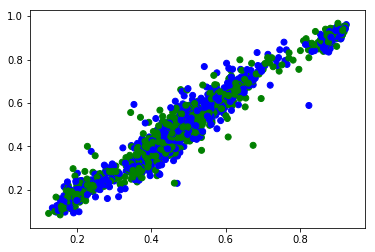

In [7]:
def costFunction(prediction):
    errCount = 0
    ndata=len(prediction)
    for i in range(ndata):
        if(not ((prediction[i]<0.5 and Yva[i]<0.5) or (prediction[i]>0.5 and Yva[i]>0.5))):
            errCount += 1
    print(errCount/float(ndata))

theta = [0.1, 0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1]
X = [forest2PredictionTR, forestPredictionTR, gradientPrediction2TR, gradientPredictionTR, adaPredictionTR, logistic41PredictionTR, knn28PredictionTR, gradient13PredictionTR, gradient12PredictionTR, gradient23PredictionTR] 

colormap = np.array(['b','g'])
plt.scatter(gradientPrediction2TR, gradientPredictionTR,c =colormap[Ytr.astype("int64")])
plt.show()

[]

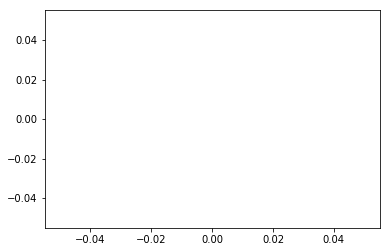

In [8]:
plt.plot()

In [9]:
def printFinalVaErr(finalPrediction):
    errCount = 0
    ndata=len(finalPrediction)
    for i in range(ndata):
        if(not ((finalPrediction[i]<0.5 and Yva[i]<0.5) or (finalPrediction[i]>0.5 and Yva[i]>0.5))):
            errCount += 1
    print(errCount/float(ndata))

In [155]:
printFinalVaErr(finalPredictionBESTtr)

0.327586206897


In [156]:
printFinalVaErr(finalPredictionTR)

0.331357758621


In [134]:
Y_test = np.vstack((np.arange(X_test.shape[0]), finalPrediction)).T
# Output a file with two columns, a row ID and a confidence in class 1:
np.savetxt('FinalPredictions.txt', Y_test, '%d, %.2f',header='ID,Predicted', delimiter=',')

In [103]:
#stacking outputs
outputs = [forest2PredictionTR, forestPredictionTR, gradientPrediction2TR, gradientPredictionTR, adaPredictionTR, logistic41PredictionTR, knn28PredictionTR, gradient13PredictionTR, gradient12PredictionTR, gradient23PredictionTR]
#outputs = [forest2PredictionTR, forestPredictionTR, gradientPrediction2TR, gradientPredictionTR, adaPredictionTR]

new_outputs = []
for i in outputs:
    new_outputs.append([[j] for j in i])
xMetaTR = np.hstack((np.array(new_outputs)))


outputs = [forest2Prediction, forestPrediction, gradientPrediction2, gradientPrediction, adaPrediction, logistic41Prediction, knn28Prediction, gradient13Prediction, gradient12Prediction, gradient23Prediction]
new_outputs = []
for i in outputs:
    new_outputs.append([[j] for j in i])
xMeta = np.hstack((np.array(new_outputs)))




In [104]:
stacked_gradient2 = GradientBoost2(xMetaTR, Yva)
stacked_gradient = GradientBoost(xMetaTR, Yva)
stacked_ada = AdaBoost(xMetaTR, Yva)


In [105]:
stacked_forest2 = RandomForest2(xMetaTR, Yva)
stacked_forest = RandomForest(xMetaTR, Yva, nFeatures = 50, maxDepth = 15, minLeaf = 4, number_of_learner=50)

In [106]:
stacked_gradient_predict = stacked_gradient.predict(xMeta)[:,1]
stacked_gradient2_predict = stacked_gradient2.predict(xMeta)
#stacked_ada_predict = stacked_ada.predict(xMeta)[:, 1]
stacked_forest2_predict = stacked_forest2.predict(xMeta)
stacked_forest_predict = stacked_forest.predict(xMeta)


In [107]:
#finalPrediction = 0.15*np.array(stacked_ada_predict)+0.1*np.array(stacked_forest_predict)+ 0.3*np.array(stacked_forest2_predict) + 0.15*np.array(stacked_gradient_predict) + 0.3*np.array(stacked_gradient2_predict)

#finalPrediction = 0.25*np.array(stacked_forest_predict)+ 0.25*np.array(stacked_forest2_predict) + 0.25*np.array(stacked_gradient_predict) + 0.25*np.array(stacked_gradient2_predict)




In [108]:
final1 = 0.15*np.array(stacked_ada_predict)+0.1*np.array(stacked_forest_predict)+ 0.3*np.array(stacked_forest2_predict) + 0.15*np.array(stacked_gradient_predict) + 0.3*np.array(stacked_gradient2_predict)
final2 = 0.15*np.array(adaPrediction)+0.1*np.array(forestPrediction)+ 0.3*np.array(forest2Prediction) + 0.15*np.array(gradientPrediction) + 0.3*np.array(gradientPrediction2)




In [112]:
finalPrediction = 0.4*final1 + 0.6*final2

In [121]:
print(finalPrediction)
print(final2)




[0.26278261 0.14219969 0.4843043  ... 0.39529332 0.92361708 0.44434865]
[0.34967738 0.23034331 0.50558605 ... 0.44670523 0.87111024 0.47130683]


In [116]:
Sv = xMetaTR
stack = ml.linearC.linearClassify(Sv,Yva, reg=1e-3)
print "** Stacked AUC: ",stack.auc(Sv,Yva)
Se = xMeta
PeS = stack.predictSoft(Se)





** Stacked AUC:  0.7536256627352602


In [117]:
print(PeS)

[[0.73721739 0.26278261]
 [0.85780031 0.14219969]
 [0.5156957  0.4843043 ]
 ...
 [0.60470668 0.39529332]
 [0.07638292 0.92361708]
 [0.55565135 0.44434865]]


In [118]:
finalPrediction = PeS[:, 1]

In [119]:
print(finalPrediction)

[0.26278261 0.14219969 0.4843043  ... 0.39529332 0.92361708 0.44434865]


In [131]:
nHidden = 500
nnet = ml.nnet.nnetClassify()
nnet.init_weights([Xtr.shape[1],nHidden,2],'random',Xtr,Ytr);
nnet.train(Xtr,Ytr,stopTol=-1,initStep=1.,stopIter=100000)


it 2 : Jsur = 0.984372193282, J01 = 0.492186096641
it 4 : Jsur = 0.97395365547, J01 = 0.486976827735
it 8 : Jsur = 0.974312915394, J01 = 0.487156457697
it 16 : Jsur = 0.989449235176, J01 = 0.494700916113
it 32 : Jsur = 1.02521181004, J01 = 0.512663912341
it 64 : Jsur = 1.03881669584, J01 = 0.502065744566
it 128 : Jsur = 0.998977832241, J01 = 0.494521286151
it 256 : Jsur = 0.924654777034, J01 = 0.463804562601
it 512 : Jsur = 0.867601811594, J01 = 0.461110113167
it 1024 : Jsur = 0.926903330508, J01 = 0.51104724268
it 2048 : Jsur = 0.819384900725, J01 = 0.518232441171
it 4096 : Jsur = 0.727856413019, J01 = 0.497754625472
it 8192 : Jsur = 0.674336053334, J01 = 0.502784264415
it 16384 : Jsur = 0.556437741203, J01 = 0.505658343812
it 32768 : Jsur = 0.525724394699, J01 = 0.472965690677
it 65536 : Jsur = 0.495604704575, J01 = 0.449254535657


In [132]:
nnet.auc(Xva, Yva)

0.5621940384313863